In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('average_perceptron_tagger')
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


In [4]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [9]:
data = pd.read_csv('Elon_musk.csv', encoding='latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [10]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [12]:
import re
def cleaning (text):
  text=re.sub('[^a-zA-Z]',' ',str(text).lower().strip())
  text=re.sub('@[a-zA-Z0-9_]+','',text)
  text=re.sub('#','',text)
  text=re.sub('RT[\s]+','',text)
  text=re.sub('https?:\/\/\S+','',text)
  text=re.sub('https','',text)
  text=re.sub('\n',' ',text)
  return(text)

In [13]:
data['Text']=data['Text'].apply(cleaning)
data

,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with h...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazi...
...,...
1994,flcnhvy true it sounds so surreal but the n...
1995,ppathole make sure to read ur terms amp con...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is u f ...


In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
def lemm(data):
  wordnet=WordNetLemmatizer()
  lemmanized=[]
  for i in range(len(data)):
    lemmed=[]
    words=word_tokenize(data['Text'].iloc[i])
    for w in words:
      lemmed.append(wordnet.lemmatize(w))
    lemmanized.append(lemmed)

  data['lemmanized']= lemmanized
  data['Text']=data['lemmanized'].apply(' '.join)
  data=data.drop('lemmanized',axis=1)
  return data
data=lemm(data)

In [15]:
data

,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with hd...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulation tesla china for amazing...
...,...
1994,flcnhvy true it sound so surreal but the negat...
1995,ppathole make sure to read ur term amp conditi...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is u f u f


## Sentiment Analysis

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
def analyze_sentiment(text):
  sentiment_score=analyzer.polarity_scores(text)

  if sentiment_score['compound' ]>= 0.05:
      return 'Positive'
  elif sentiment_score['compound']<=-0.05:
      return 'Negative'
  else:
      return 'Neutral'

data['Sentiment']=data['Text'].apply(analyze_sentiment)
print(data[['Text','Sentiment']])

                                                   Text Sentiment
0                                   kunalb i m an alien   Neutral
1     id aa carmack ray tracing on cyberpunk with hd...   Neutral
2                      joerogan spotify great interview  Positive
3                          gtera doge is underestimated  Negative
4     teslacn congratulation tesla china for amazing...  Positive
...                                                 ...       ...
1994  flcnhvy true it sound so surreal but the negat...  Negative
1995  ppathole make sure to read ur term amp conditi...  Positive
1996                  teslagong ppathole samwise gamgee   Neutral
1997          ppathole altho dumb and dumber is u f u f  Negative
1998                             progress update august  Positive

[1999 rows x 2 columns]


In [17]:
data

,Text,Sentiment
0,kunalb i m an alien,Neutral
1,id aa carmack ray tracing on cyberpunk with hd...,Neutral
2,joerogan spotify great interview,Positive
3,gtera doge is underestimated,Negative
4,teslacn congratulation tesla china for amazing...,Positive
...,...,...
1994,flcnhvy true it sound so surreal but the negat...,Negative
1995,ppathole make sure to read ur term amp conditi...,Positive
1996,teslagong ppathole samwise gamgee,Neutral
1997,ppathole altho dumb and dumber is u f u f,Negative


<Axes: xlabel='Sentiment', ylabel='count'>

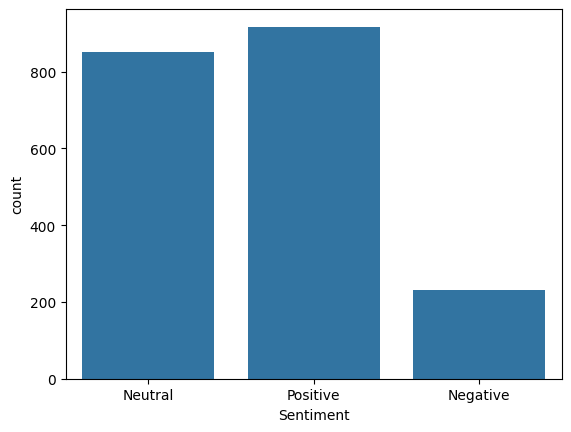

In [18]:
import seaborn as sns
sns.countplot(x='Sentiment',data=data)

In [19]:
from nltk.corpus import stopwords
removal=list(stopwords.words('english'))+list(punctuation)
stemmer=LancasterStemmer()
corpus=data['Text'].tolist()
print(len(corpus))

1999


In [20]:
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer

# Assuming 'removal' is a list of words to be removed

final_corpus = []
final_corpus_joined = []

for i in data.index:
    text = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    text = text.lower()
    text = re.sub('<.*?>', '', text)  # Changed the regex for removing tags
    text = re.sub(r'(\d|\W)+', ' ', text)
    text = text.split()

    lemm = WordNetLemmatizer()
    lemmatizer = [lemm.lemmatize(word) for word in text if word not in removal]
    text = ' '.join(lemmatizer)  # Changed to join lemmatizer instead of the original 'text'

    final_corpus.append(text)
    final_corpus_joined.append(text)  # Changed to append 'text' instead of the string 'text'

data_1 = pd.DataFrame()
data_1['Text'] = final_corpus
data_1['Sentiment'] = data['Sentiment'].values

data_1.head()


,Text,Sentiment
0,kunalb alien,Neutral
1,id aa carmack ray tracing cyberpunk hdr next l...,Neutral
2,joerogan spotify great interview,Positive
3,gtera doge underestimated,Negative
4,teslacn congratulation tesla china amazing exe...,Positive


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_1['Sentiment']=le.fit_transform(data['Sentiment'])
data_1

,Text,Sentiment
0,kunalb alien,1
1,id aa carmack ray tracing cyberpunk hdr next l...,1
2,joerogan spotify great interview,2
3,gtera doge underestimated,0
4,teslacn congratulation tesla china amazing exe...,2
...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0
1995,ppathole make sure read ur term amp condition ...,2
1996,teslagong ppathole samwise gamgee,1
1997,ppathole altho dumb dumber u f u f,0


In [22]:
pos=data_1[data_1['Sentiment']==2]
pos_list=pos['Text'].tolist()
neg=data_1[data_1['Sentiment']==0]
neg_list=neg['Text'].tolist()

In [23]:
pos_all=''.join([word for sent in pos_list for word in sent])
neg_all=''.join([word for sent in neg_list for word in sent])

pos_all

'joerogan spotify great interviewteslacn congratulation tesla china amazing execution last year next evenhappy new year ox co wfkmyu ojowensparks flcnhvy anonyx haha thanksflcnhvy anonyx indeed tweet definitely represent real world time allocationentertaining outcome likelyagree clubhouse kanyewestjoshmanmode definitely ha issue sentencing seems bit highfreewalletorg thanks fixingfreewalletorg please unlock accounttrue power haha co fc uhqsdfreewalletorg crypto wallet give private key avoided costrt spacex nasa ha selected falcon heavy launch first two element lunar gateway together one mission co pwtajtourville yesblkmdl rationaletienne adamklotz predict cash flow reasonably well starlink ipoxprize team manage carbon capture prize co fsw ianl rmichaelgalanin kevinmgill wowerdayastronaut michaelhodapp orbital launch tower stack enough raptor orbit booster improve ship amp booster massnivetha lexfridman cute u fitsallrisky fun cryptowapodavenport trueastrojordy yestheonion read thebabyl

## PositiveWords

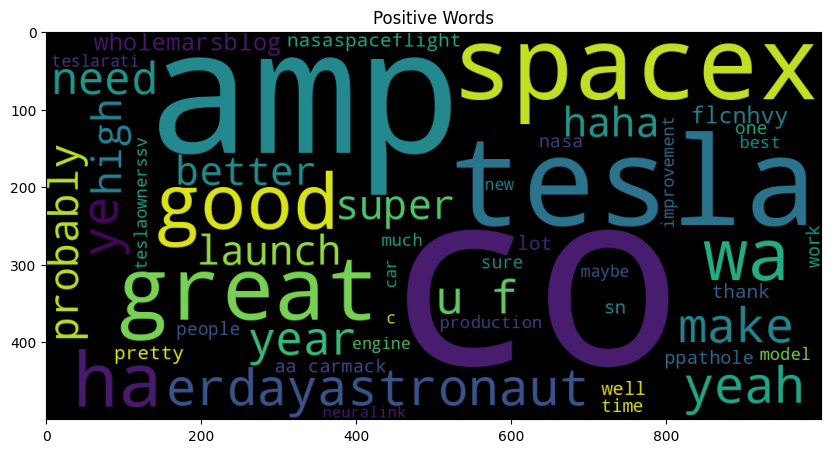

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud()
wordcloud=WordCloud(width=1000,height=500,max_words=50,background_color='Black',).generate(pos_all)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('Positive Words')
plt.show()

## NegativeWords

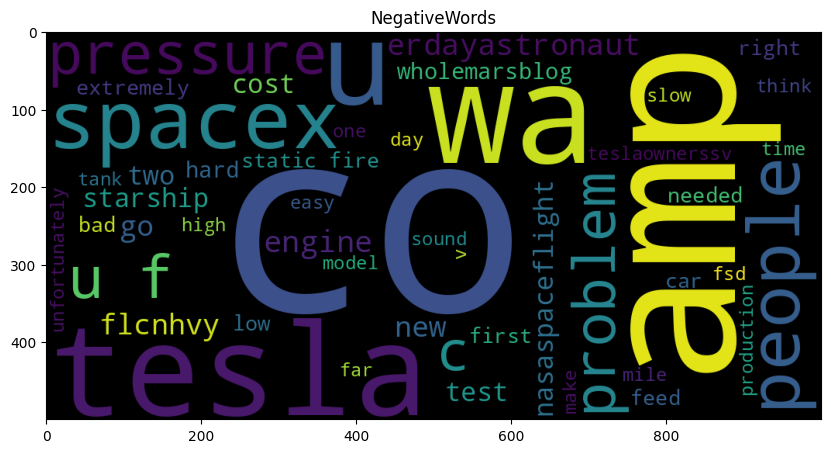

In [25]:
from wordcloud import WordCloud
WordCloud()
wordcloud=WordCloud(width=1000,height=500,max_words=50,background_color='Black').generate(neg_all)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('NegativeWords')
plt.show()

# MachineLearning Algoritham
Logistic Regression

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
x=tfid.fit_transform(data['Text'])
y=data['Sentiment']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print(accuracy_score(y_train,y_train_pred)*100)

90.74421513445904
